# Prezentacja wynikow osiaganych przez model

## Wizualizacja wyników przewidywań na zbiorze testowym

### Importowanie potrzebnych bibliotek

In [1]:
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy.random
import torch
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

### Klasa reprezentująca sieć konwolucyjną

In [2]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 26)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

### Metoda testowa przetwarzająca pojedyńczo obrazy i wyświetlająca je oraz przewidywaną etykietę

In [3]:
def test_single_image(model, x_test, ax):
    x_test_copy = np.expand_dims(x_test, axis=0)
    x_test_copy = np.expand_dims(x_test_copy, axis=0)

    x_test_tensor = torch.from_numpy(x_test_copy).float()

    model.eval()
    with torch.no_grad():
        pred = model(x_test_tensor)
        _, predicted_label = torch.max(pred, 1)
        predicted_label = predicted_label.item()

    ax.imshow(x, cmap='gray')
    ax.set_title(f"Predicted: {chr(ord('A') + predicted_label)}")
    ax.axis('off')

### Ładowanie danych testowych

In [4]:
X_test = np.load('X_train.npy/X_train.npy')
numpy.random.shuffle(X_test)

model = torch.load('convolutional_NN.pth')

In [5]:
test_accuracy = np.load('test_accuracy.npy')
test_l = np.load('test_loss.npy')
y_pred_test = np.load('y_pred_test.npy')
y_real_test = np.load('y_real_test.npy')
train_accuracy = np.load('train_accuracy.npy')
train_l = np.load('train_loss.npy')
y_pred_train = np.load('y_pred_train.npy')
y_real_train = np.load('y_real_train.npy')

### Przykładowe przewidywania wytrenowanego modelu

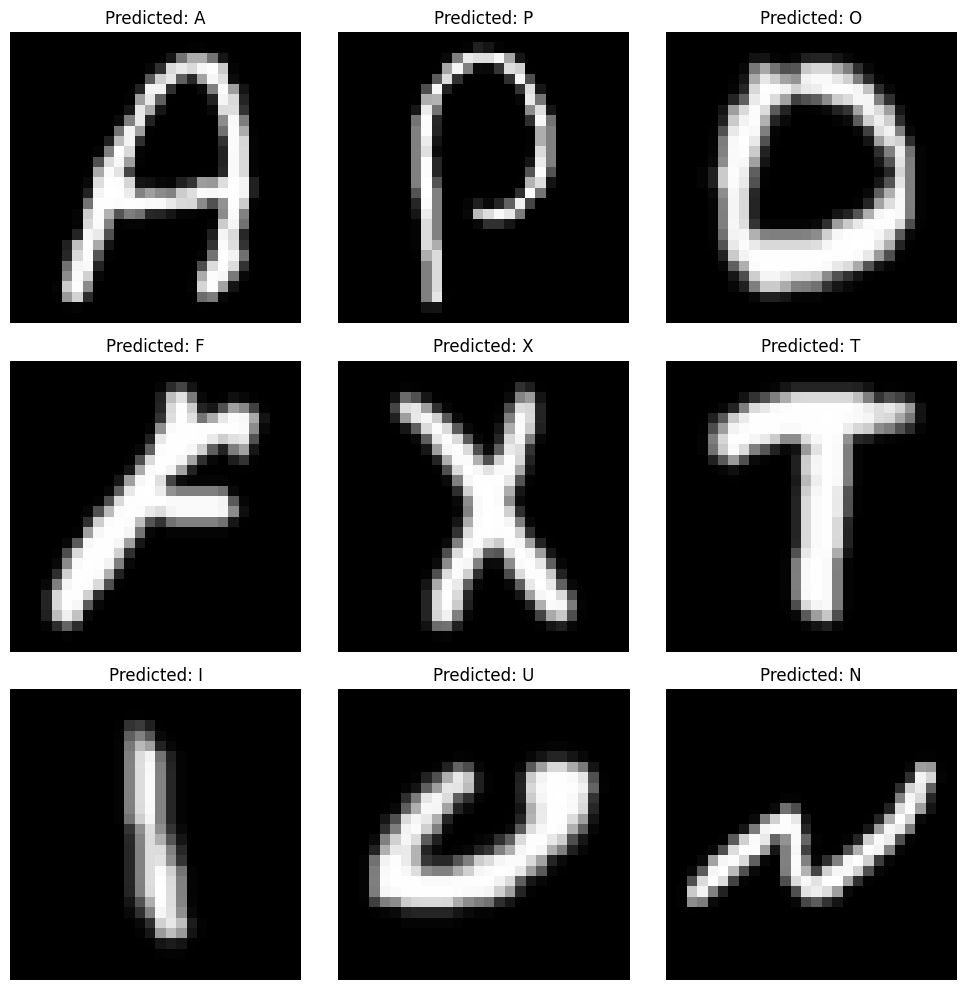

In [6]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))
X_test = X_test[:9]
for x, ax in zip(X_test, axes.flatten()):
    test_single_image(model, x, ax)

plt.tight_layout()
plt.show()

## Wizualizacja wyników uzyskanych na zbiorach testowym i walidacyjnym

### Dokładność oraz wartość funkcji straty po zakończonym trenowaniu modelu

In [7]:
print(f"Dokladnosc dla zbioru treningowego: {train_accuracy}%")
print(f"Wartosc funkcji straty dla zbioru treningowego: {train_l}")
print(f"Dokladnosc dla zbioru walidacyjnego: {test_accuracy}%")
print(f"Wartosc funkcji straty dla zbioru treningowego: {test_l}")

Dokladnosc dla zbioru treningowego: 91.167%
Wartosc funkcji straty dla zbioru treningowego: 0.327
Dokladnosc dla zbioru walidacyjnego: 91.683%
Wartosc funkcji straty dla zbioru treningowego: 0.31


### Dokładność oraz wartość funkcji straty w zależności od numeru epoki

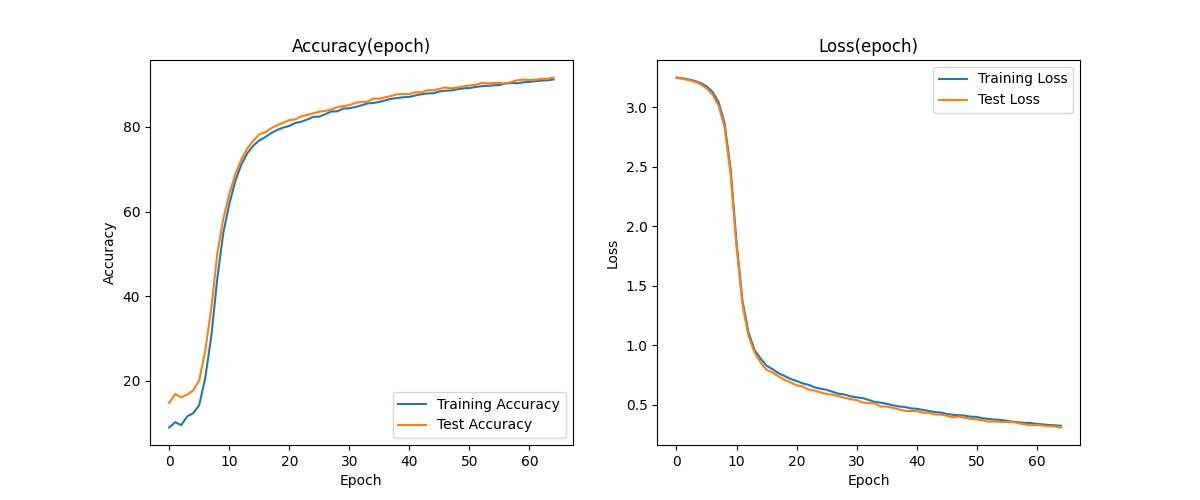

### Heatmapy 

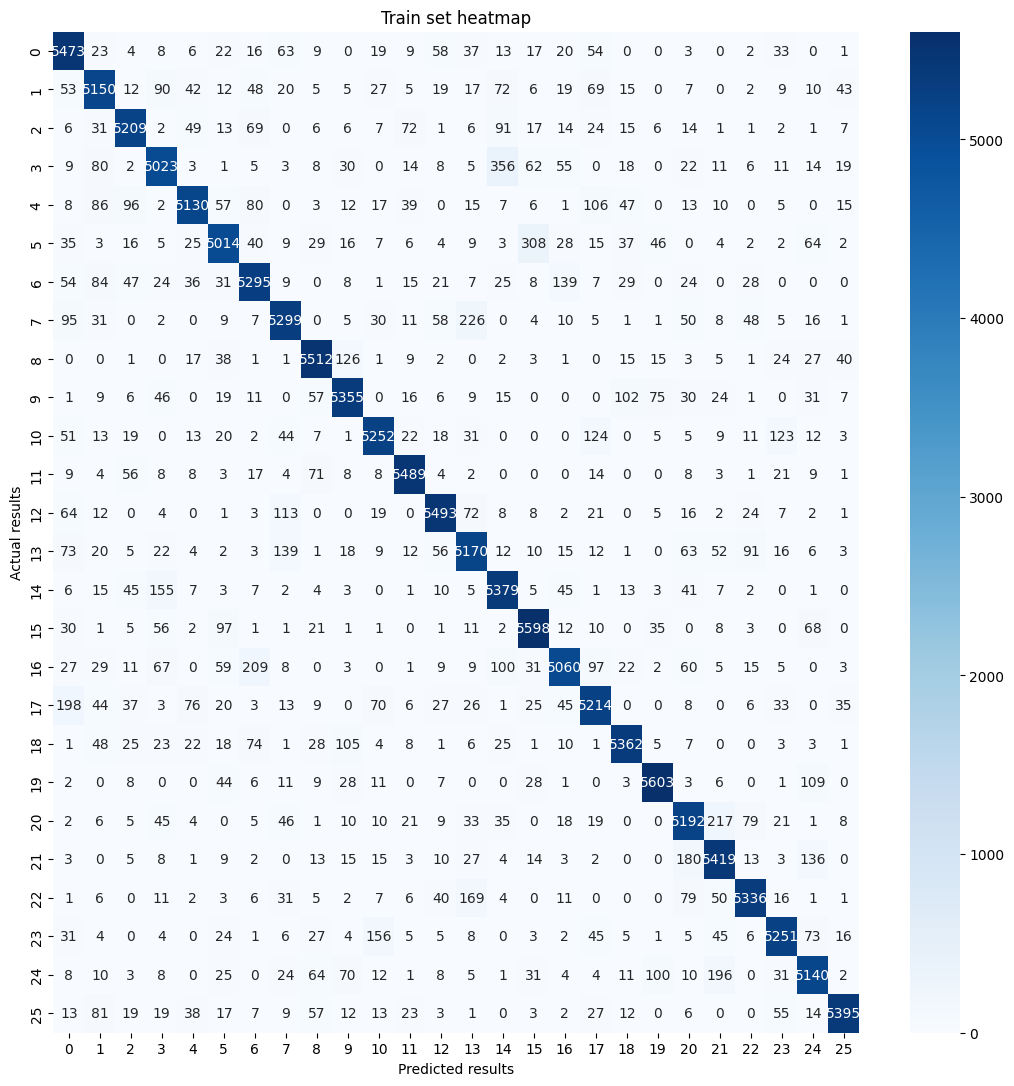

In [8]:
confusion_matrix_train = confusion_matrix(y_real_train, y_pred_train)
confusion_matrix_test = confusion_matrix(y_real_test, y_pred_test)

plt.figure(figsize=(13, 13))
sns.heatmap(confusion_matrix_train, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual results')
plt.xlabel('Predicted results')
plt.title('Train set heatmap')
plt.show()

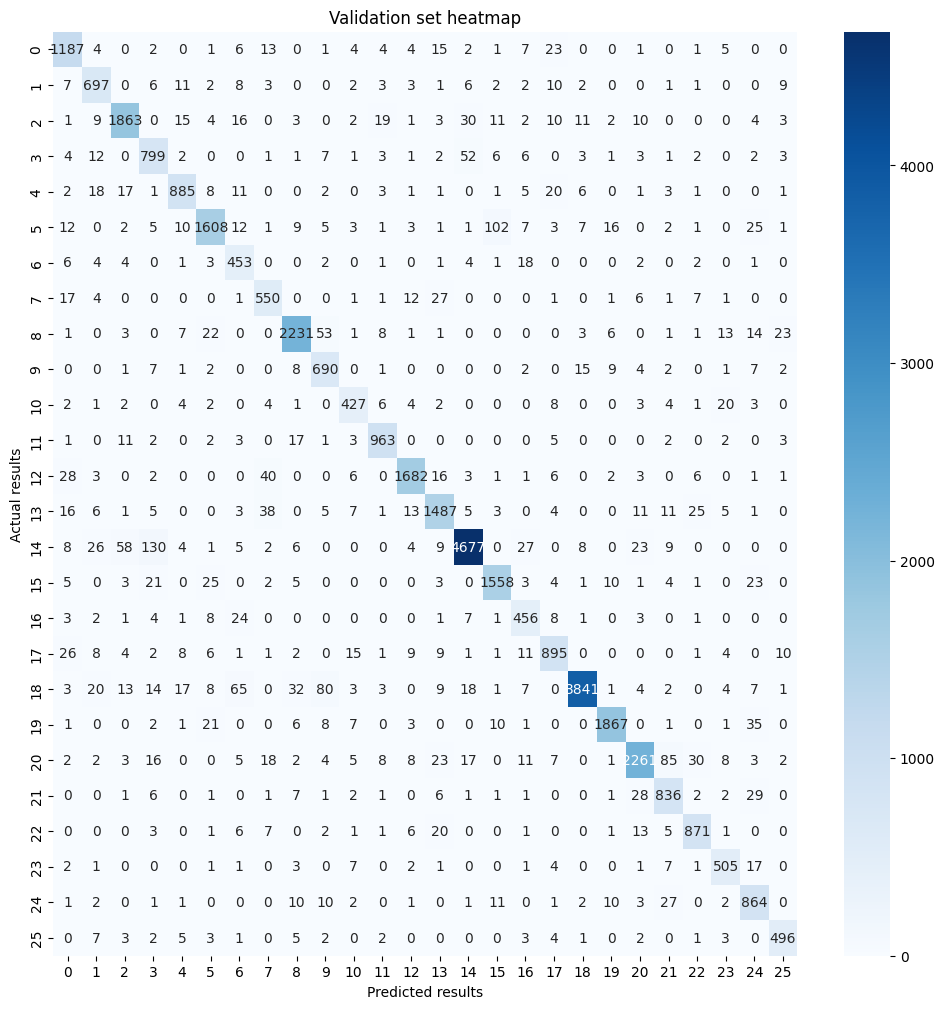

In [9]:
plt.figure(figsize=(12, 12))
sns.heatmap(confusion_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual results')
plt.xlabel('Predicted results')
plt.title('Validation set heatmap')
plt.show()

### Raporty klasyfikacyjne

In [10]:
print(classification_report(y_real_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      5890
           1       0.89      0.89      0.89      5757
           2       0.92      0.92      0.92      5670
           3       0.89      0.87      0.88      5765
           4       0.94      0.89      0.91      5755
           5       0.90      0.88      0.89      5729
           6       0.89      0.90      0.90      5892
           7       0.90      0.89      0.90      5922
           8       0.93      0.94      0.94      5844
           9       0.92      0.92      0.92      5820
          10       0.92      0.91      0.91      5785
          11       0.95      0.95      0.95      5748
          12       0.93      0.93      0.93      5877
          13       0.88      0.89      0.88      5815
          14       0.87      0.93      0.90      5760
          15       0.90      0.94      0.92      5964
          16       0.92      0.87      0.89      5832
          17       0.89    

In [11]:
print(classification_report(y_real_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1281
           1       0.84      0.90      0.87       776
           2       0.94      0.92      0.93      2019
           3       0.78      0.88      0.82       912
           4       0.91      0.90      0.90       987
           5       0.93      0.88      0.90      1837
           6       0.73      0.90      0.81       503
           7       0.81      0.87      0.84       630
           8       0.95      0.93      0.94      2389
           9       0.79      0.92      0.85       752
          10       0.86      0.86      0.86       494
          11       0.93      0.95      0.94      1015
          12       0.96      0.93      0.95      1801
          13       0.91      0.90      0.91      1647
          14       0.97      0.94      0.95      4997
          15       0.91      0.93      0.92      1669
          16       0.80      0.88      0.83       521
          17       0.88    